In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [404]:



data = pd.read_csv("WHR2024.csv")
data = data.dropna()
Hapinness_score= data['Ladder score']
features = [
    'Explained by: Log GDP per capita',
    'Explained by: Social support'
    ,'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity'
    ,'Explained by: Perceptions of corruption'
    ,'Dystopia + residual'
]

data = data[features]







[44.2 17.3 14.8 10.2  7.6  3.7  2.2]


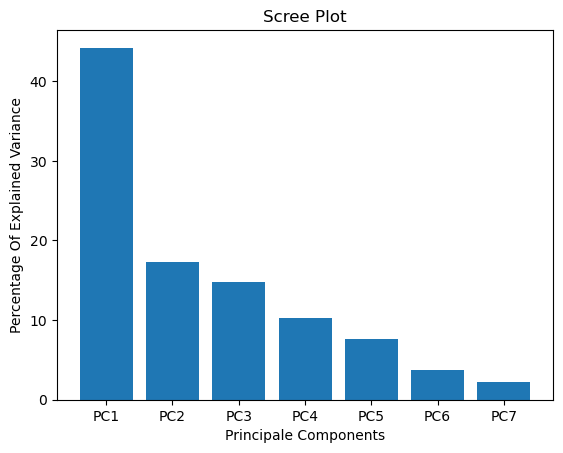

[[ 0.50540701  0.48007894  0.49942503  0.37899917  0.07468933  0.32802345
   0.0885683 ]
 [-0.28927959 -0.04944116 -0.21528282  0.39340427  0.64866833  0.1002387
   0.53098105]
 [-0.01091025  0.17718662  0.03145675  0.06411383 -0.52881368 -0.43409802
   0.70377607]
 [-0.04287087 -0.37283454 -0.10874463  0.02705834 -0.42679124  0.77491678
   0.25288767]
 [-0.09618203 -0.07607281 -0.2430385   0.82193779 -0.30329426 -0.15172923
  -0.36783601]
 [-0.16279114  0.74236698 -0.57259274 -0.14323707 -0.09677124  0.24345127
  -0.07333363]
 [ 0.78941256 -0.19945748 -0.55179966 -0.02552224  0.10248968 -0.1054772
   0.10139382]]


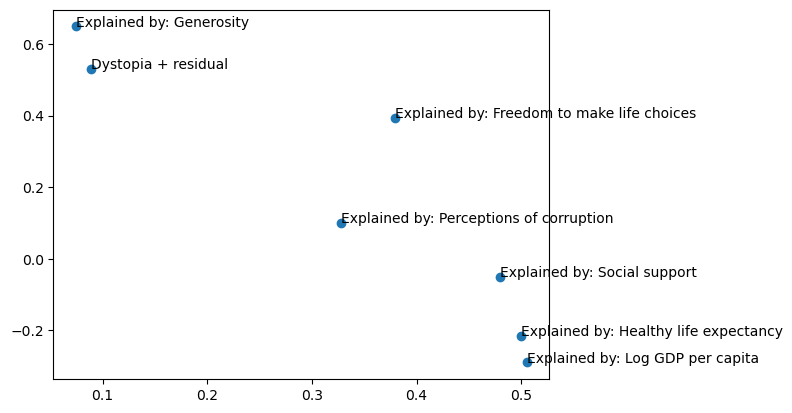

[[ 3.37612605e+00  7.44457654e-01 -3.07222620e-01  2.06430692e+00
  -5.58632673e-02  6.76740860e-01 -2.56865261e-01]
 [ 3.34046663e+00  9.67661357e-01 -1.06918325e+00  1.66335016e+00
  -3.68473195e-01  5.03230072e-01 -6.70167883e-02]
 [ 2.62545939e+00  1.29161642e+00  8.02747227e-02 -9.45951287e-01
  -3.31366706e-01 -1.35161956e-01  1.75774827e-01]
 [ 3.30618064e+00  9.05135686e-01 -1.40090020e+00  1.32137402e+00
  -2.06474329e-01  3.33517339e-01 -1.96113556e-01]
 [ 1.99479273e+00  2.22965632e-01  1.00724172e+00 -6.83588408e-02
  -9.74415402e-01 -1.30649170e-01 -6.22753605e-02]
 [ 2.62920566e+00  9.99482717e-01 -8.07903023e-01  3.84918794e-01
  -8.44537513e-01  3.76628086e-02  1.59252419e-01]
 [ 3.23664269e+00  7.94456705e-01 -1.37754205e+00  1.01073769e+00
  -1.27323282e-01  3.41656599e-01  2.39307328e-02]
 [ 2.93773448e+00 -1.76810075e-01 -7.98874227e-01  1.27797620e+00
   1.05946929e-01 -6.81391497e-02  3.91036041e-01]
 [ 3.04616599e+00  1.67814820e-02 -1.25750898e+00  1.40844979e+0

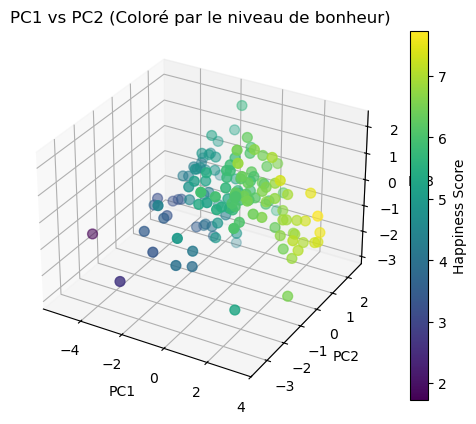

In [412]:

from sklearn.preprocessing import StandardScaler
data = data.select_dtypes(include=["float64","int64"])

data = data.dropna()


scaled_data = StandardScaler().fit_transform(data)
pca = PCA()
pca_result = pca.fit_transform(scaled_data)



per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
print(per_var)
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage Of Explained Variance')
plt.xlabel('Principale Components')
plt.title("Scree Plot")
plt.show()




loadings = pca.components_

print(loadings)


plt.scatter(loadings[0,:],loadings[1,:])

for i,feature in enumerate(features):
    plt.annotate(feature,(loadings[0,i],loadings[1,i]))

plt.show()


print(pca_result)


pc1 = pca_result[:, 0]
pc2 = pca_result[:, 1]
pc3=pca_result[:,2]

# Création du scatter plot
fig = plt.figure()
ax =  fig.add_subplot(111,projection='3d')

scatter = ax.scatter(pc1,pc2,pc3,c=Hapinness_score, cmap='viridis',s=50)
plt.colorbar(scatter, label='Happiness Score')  # Barre de couleurs pour le bonheur
plt.title('PC1 vs PC2 (Coloré par le niveau de bonheur)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()



In [386]:
from sklearn.impute import KNNImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error


# Initialisation de KNNImputer et de KFold
best_k = None
lowest_mse = float('inf')
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Tester pour plusieurs valeurs de K
for k in range(1, 10):  # Tester différents K
    knn_imputer = KNNImputer(n_neighbors=k)
    errors = []

    # Validation croisée pour chaque valeur de K
    for train_index, test_index in kf.split(data):
        train_data = data[train_index]
        test_data = data[test_index]

        # Apprentissage sur les données d'entraînement et imputation des données de test
        knn_imputer.fit(train_data)
        imputed_data = knn_imputer.transform(test_data)

        # Calcul de l'erreur (MSE) entre les valeurs réelles et imputées
        mse = mean_squared_error(np.nan_to_num(test_data), imputed_data)
        errors.append(mse)

    # Calcul de l'erreur moyenne pour cette valeur de K
    mean_mse = np.mean(errors)
    
    # Mise à jour de la meilleure valeur de K
    if mean_mse < lowest_mse:
        lowest_mse = mean_mse
        best_k = k

# Affichage du meilleur K et de l'erreur moyenne associée
print(f"Meilleur K: {best_k} avec une erreur moyenne (MSE): {lowest_mse}")


knn_imputer = KNNImputer(n_neighbors=1)
knn_imputer.fit(data)
data_cleaned = knn_imputer.transform(data)

KeyError: "None of [Index([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,\n       ...\n       126, 128, 129, 130, 133, 134, 135, 136, 137, 139],\n      dtype='int32', length=112)] are in the [columns]"

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

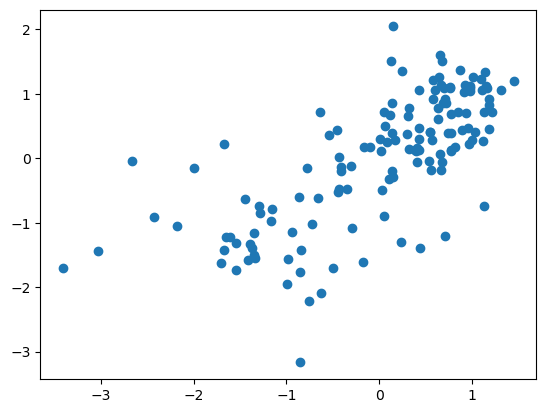

In [324]:

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data)
plt.scatter(X[:,1],X[:,2])
plt.show()

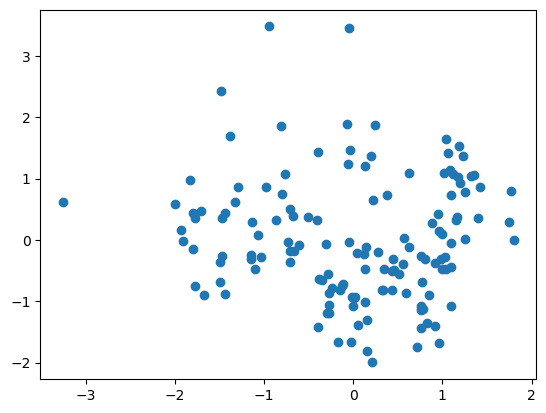

In [325]:
pca = PCA(svd_solver="full")
pca.fit_transform(X)

plt.scatter(X[:,0],X[:,4])
plt.show()


In [334]:
"""
Justification du choix des paramètres : 
whiten = False car cela supprime la correlation en normalisant les valeurs en diviser par leurs valeurs singulières

svd_solver = full car on veut une certaine précision sur l'ensemble des composantes  et la matrice est assez petite (< 1000*1000) 
"""


n = 148 #Nombre d'individus (pays)

print(pca)


components = pca.components_
n_components = pca.n_components_
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance = pca.explained_variance_





print("Composantes principales : ", pca.components_)
print("Valeurs_singulières : ", pca.singular_values_)
print('Nombre de composantes', pca.n_components_)
print('Variance expliquée', pca.explained_variance_)
eigval = (n-1)/n*pca.explained_variance_
print("Eigval :",eigval)
print('Porportion de variance expliqu´ee', pca.explained_variance_ratio_)

PCA(n_components=4, svd_solver='full')
Composantes principales :  [[ 0.50540701  0.48007894  0.49942503  0.37899917  0.07468933  0.32802345
   0.0885683 ]
 [-0.28927959 -0.04944116 -0.21528282  0.39340427  0.64866833  0.1002387
   0.53098105]
 [-0.01091025  0.17718662  0.03145675  0.06411383 -0.52881368 -0.43409802
   0.70377607]
 [-0.04287087 -0.37283454 -0.10874463  0.02705834 -0.42679124  0.77491678
   0.25288767]]
Valeurs_singulières :  [20.82056607 13.01863786 12.05366913 10.01174116]
Nombre de composantes 4
Variance expliquée [3.11867605 1.21931606 1.04525856 0.72111483]
Eigval : [3.09760392 1.21107743 1.038196   0.71624243]
Porportion de variance expliqu´ee [0.44234283 0.17294381 0.14825606 0.10228057]


[44.2342828  17.29438079 14.82560607 10.22805726  7.5635913   3.68578151
  2.16830029]


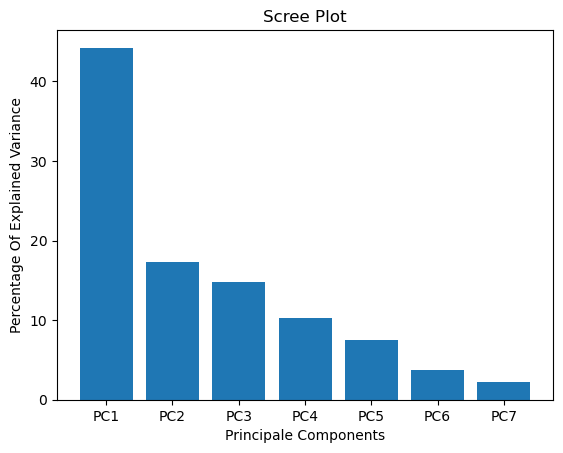

In [340]:
per_var = pca.explained_variance_ratio_*100
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
print(per_var)
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage Of Explained Variance')
plt.xlabel('Principale Components')
plt.title("Scree Plot")
plt.show()

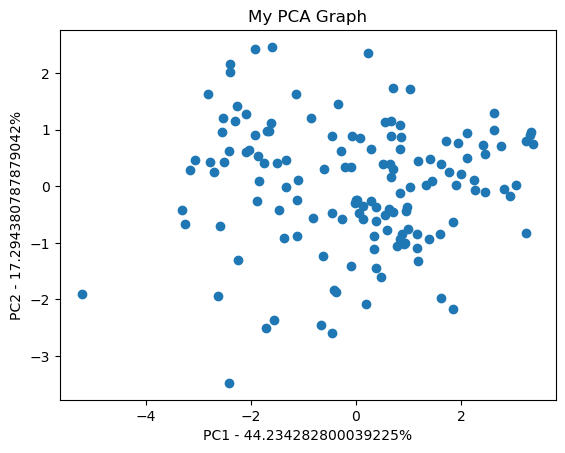

C:\Users\gmrou\AppData\Local\Temp\ipykernel_33092\433767510.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(pca_df.PC1,pca_df.PC2,pca_df.PC3,cmap='viridis',s=50)


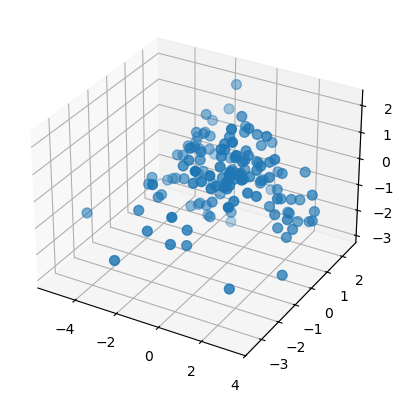

Explained by: Log GDP per capita              0.096182
Explained by: Social support                  0.076073
Explained by: Healthy life expectancy         0.243039
Explained by: Freedom to make life choices    0.821938
Explained by: Generosity                      0.303294
Explained by: Perceptions of corruption       0.151729
Dystopia + residual                           0.367836
dtype: float64


In [348]:
pca = PCA(n_components =7,svd_solver="full")
pca.fit(X)

pca_data = pca.transform(X)

pca_df = pd.DataFrame(pca_data , columns=labels)

plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.show()


fig = plt.figure()
ax =  fig.add_subplot(111,projection='3d')

scatter = ax.scatter(pca_df.PC1,pca_df.PC2,pca_df.PC3,cmap='viridis',s=50)
plt.show()


loadings_scores= pd.Series(pca.components_[4],index=features)
sorted_loading_scores = loadings_scores.abs().sort_values(ascending=False)

print(sorted_loading_scores[features])



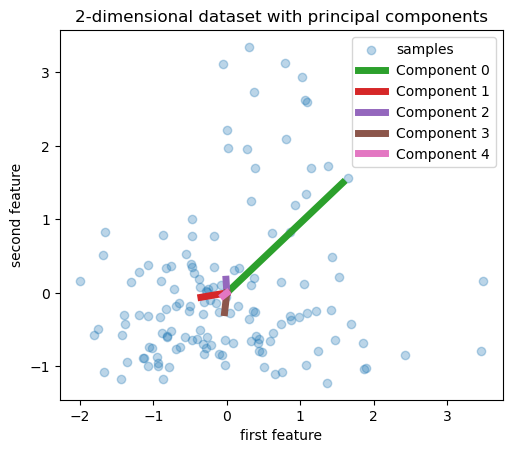

In [309]:
plt.scatter(X[:, 4], X[:, 5], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

In [237]:
p = 5
# racine carr´ee des valeurs propres
sqrt_eigval = np.sqrt(eigval)
# corr´elation des variables avec les axes
corvar = np.zeros((p,p))

for k in range(p):
  corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# afficher la matrice des corr´elations variables x facteurs
print(corvar)

ValueError: could not broadcast input array from shape (7,) into shape (5,)

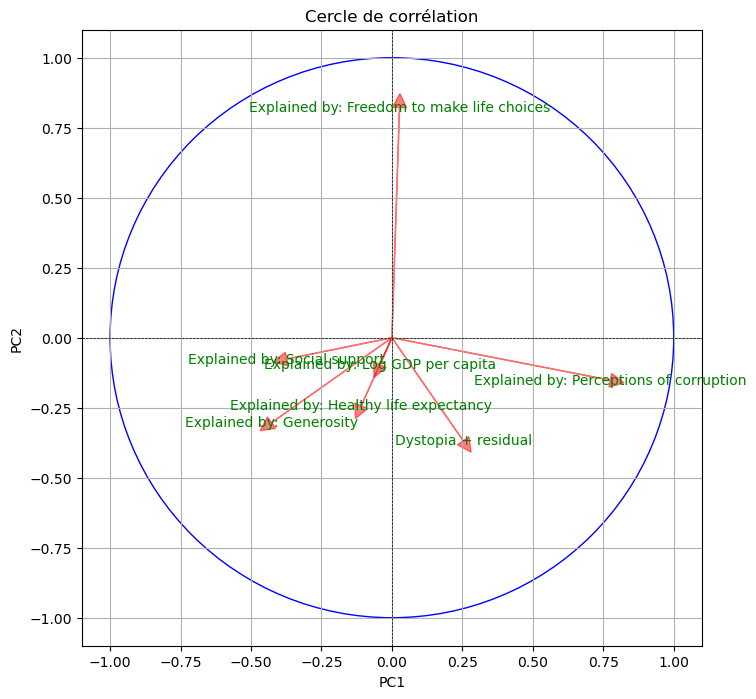

In [310]:
loadings = pca.components_.T  # Transpose pour obtenir [variables, composantes principales]
loadings = loadings[:,3:5]
# Créer le cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))

# Tracer un cercle unitaire
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_artist(circle)

# Ajouter les flèches pour les variables
for i, (x, y) in enumerate(loadings):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(x, y, features[i] if features else f"Var{i+1}", color='g', ha='center', va='center')

# Configurer les axes
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.title("Cercle de corrélation")
plt.show()